<a href="https://colab.research.google.com/github/Gnome101/MAT_421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Differentiation

## 20.1 Numerical Differentiation Intro

Often the derivative is desired for modelling something but the exact function is not known. Thus, numerical differentiation is needed.

A function can bre represented over an interval via its value in a grid. The representation of the value is discrete.

## 20.2 Finite Diference Approximation Derivatives

$f(x) = lim_{x\to a}\frac{f(x) - f(a)}{x-a}$

The derivative at x = a is the slope
The foward difference estimates the slope with $x_j$ and $x_{j+1}$.

The backward difference estimates the slope with $x_j$ and $x_{j-1}$

The central difference estimates the slope with $x_{j-1}$ and $x_{j+1}$.

We can use a taylor series of x at two different points

<ipython-input-135-9398804a4fda>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


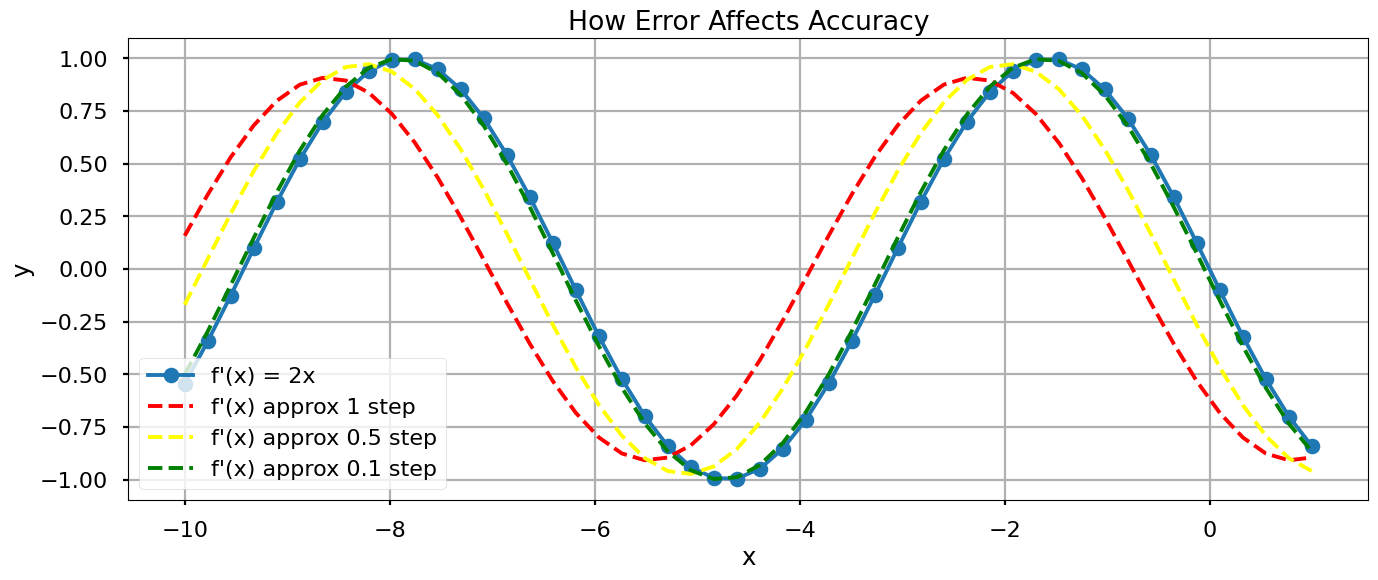

In [135]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline
f = lambda x: np.cos(x)
df = lambda x: -np.sin(x)
def forward_finite_difference(f, x, h=1.5):
    return (f(x + h) - f(x)) / h
# def backward_finite_difference(f, x, h=0.01):
#     return (f(x) - f(x-h)) / h

x = np.linspace(-10, 1, 50)
actual_derivative= df(x)
approx_derivativeA = forward_finite_difference(f, x)
approx_derivativeB = forward_finite_difference(f, x,0.8)
approx_derivativeC = forward_finite_difference(f, x,0.1)


plt.figure(figsize=(16, 6))
plt.plot(x, actual_derivative,marker='o', label="f'(x) = 2x")
plt.plot(x, approx_derivativeA, label="f'(x) approx 1 step", linestyle='--', color = "red")
plt.plot(x, approx_derivativeB, label="f'(x) approx 0.5 step", linestyle='--', color = "yellow")
plt.plot(x, approx_derivativeC, label="f'(x) approx 0.1 step", linestyle='--', color = "green")

plt.xlabel('x')
plt.ylabel('y')
plt.title('How Error Affects Accuracy')
plt.legend()
plt.grid(True)
plt.show()
#As you can see as the step size gets smaller the function better matches the derivative


<ipython-input-136-5f64295c0885>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


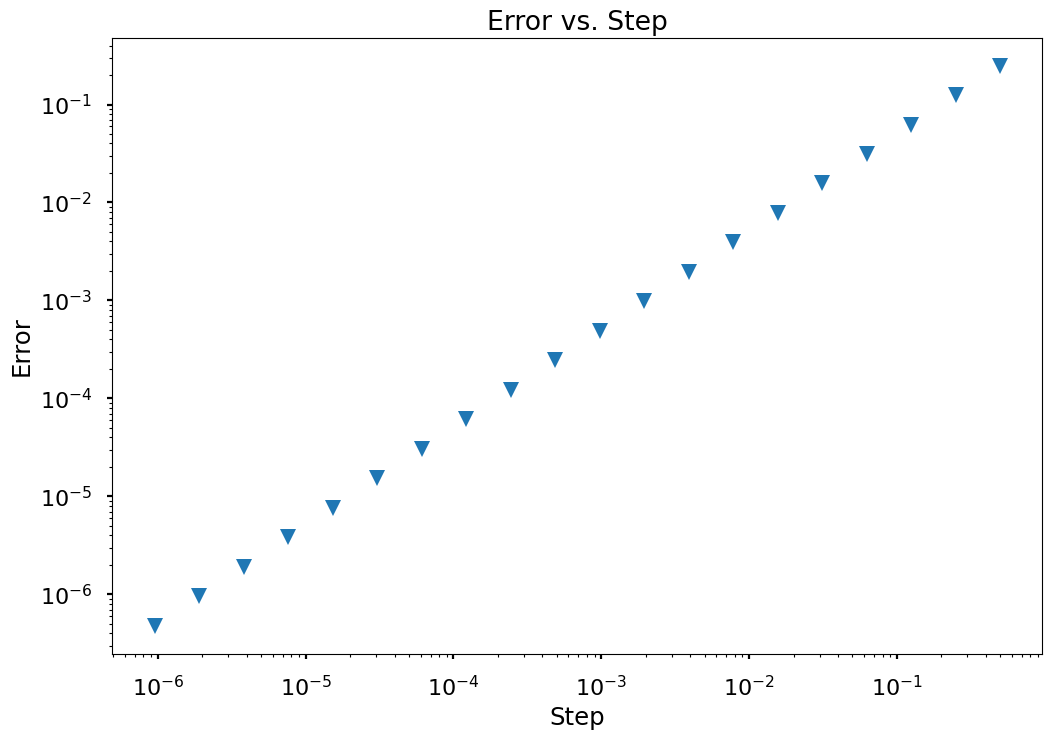

In [136]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))


plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.xlabel('Step')
plt.ylabel('Error')
plt.title('Error vs. Step')
plt.show()
#This plot essentially shows how for the foward difference computation
#there is a linear correlation on a logscale between the error and

## 20.3 Approximating of Higher Order Derivatives

A taylor series can be used to approximate higher order derivatives as well


<ipython-input-137-fb306c6d2c46>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


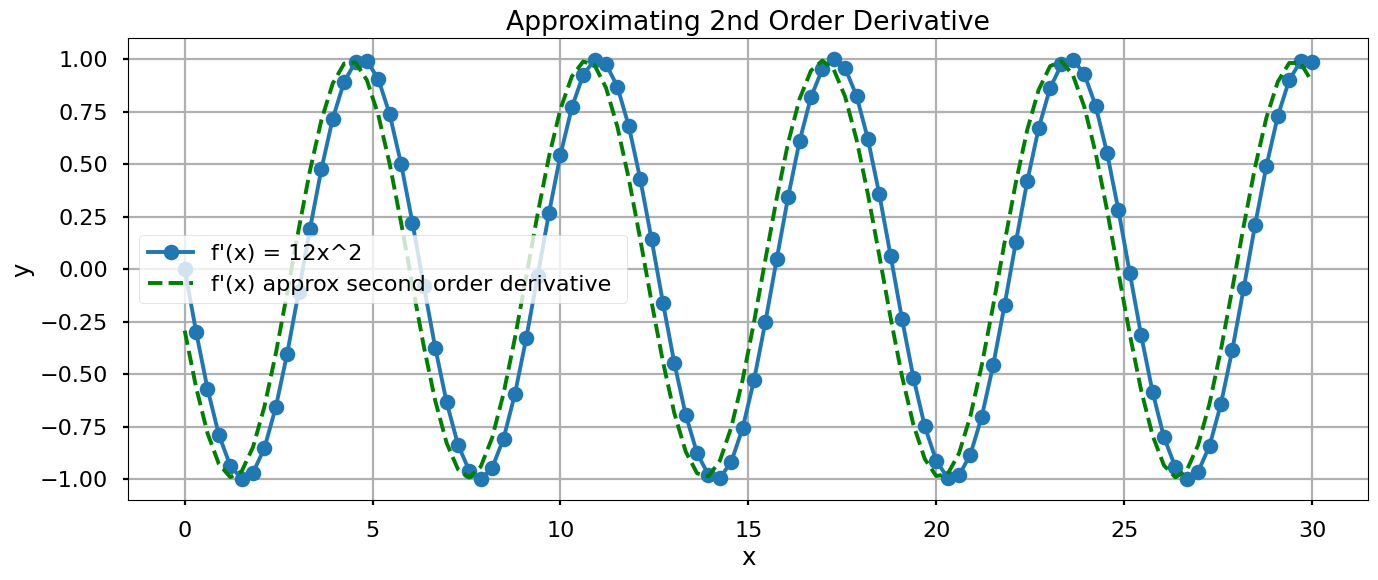

In [137]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline
f = lambda x: np.sin(x)
d2f = lambda x: -np.sin(x)
def forward_finite_difference(f, x, h=0.01):
    return (f(x + h) - f(x)) / h

#The second order difference is essentially recurison
def second_order_difference(f,x,h=0.3):
  return(forward_finite_difference(f,x+h,h) - forward_finite_difference(f,x,h))/h
# def backward_finite_difference(f, x, h=0.01):
#     return (f(x) - f(x-h)) / h

x = np.linspace(0, 30, 100)
actual_derivative= d2f(x)
approx_derivativeA = second_order_difference(f, x)



plt.figure(figsize=(16, 6))
plt.plot(x, actual_derivative,marker='o', label="f'(x) = 12x^2")
plt.plot(x, approx_derivativeA, label="f'(x) approx second order derivative ", linestyle='--', color = "green")


plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximating 2nd Order Derivative')
plt.legend()
plt.grid(True)
plt.show()
#As you can see the approximation is close to the true
#I made the step size a little higher so you can see the two more clearly


## 20.4 Numerical Differentiation with Noise

  Sometimes finite numerical differentiation can struggle with noise as it can mess up the outputs of the script
  For example take the function below
  $f(x) = cos(x)$
  This function is modeled by our imperfect measurments as
  $g(x) = cos(x) + ϵsin(𝑤x) $
  Where 𝑤 is a large number ϵ is a very small number below 1.
  Issues arise when the derivative is taken as

  $g'(x) = -sin(x) + ϵ * 𝑤 * cos(𝑤x)$
  This leads to a large variation in the derivative that won't be accounted for by the approximation



<ipython-input-138-095360770100>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


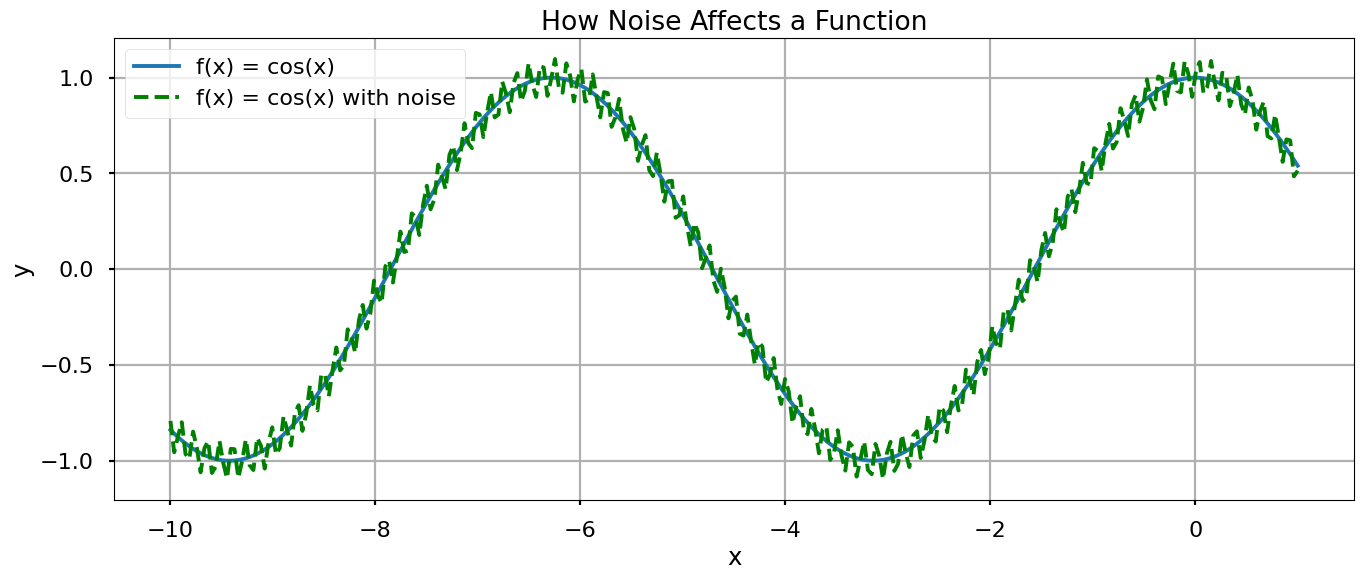

In [138]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline
e = 0.1;
w = 50;
f = lambda x: np.cos(x)
g = lambda x: np.cos(x) + e*np.sin(w*x)
# df = lambda x: -np.sin(x)
def forward_finite_difference(f, x, h=1.5):
    return (f(x + h) - f(x)) / h
# def backward_finite_difference(f, x, h=0.01):
#     return (f(x) - f(x-h)) / h

x = np.linspace(-10, 1, 300)
y= f(x)
h = g(x)
# h = forward_finite_difference(f, x,0.1)


plt.figure(figsize=(16, 6))
plt.plot(x, y, label="f(x) = cos(x)")
plt.plot(x, h, label="f(x) = cos(x) with noise", linestyle='--', color = "green")

plt.xlabel('x')
plt.ylabel('y')
plt.title('How Noise Affects a Function')
plt.legend()
plt.grid(True)
plt.show()
#As you can see the noise causes the green line to be slightly different than how it should


<ipython-input-139-1a76f753c350>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


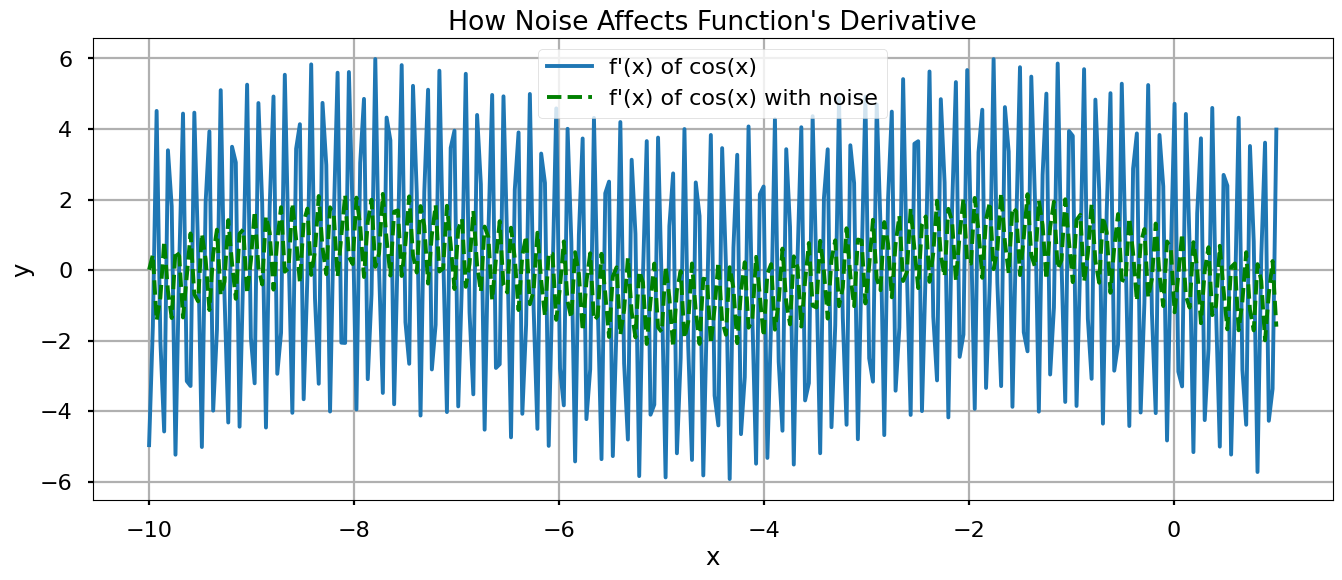

In [139]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline
e = 0.1;
w = 50;
f = lambda x: np.cos(x)
g = lambda x: np.cos(x) + e*np.sin(w*x)
dg = lambda x: -np.sin(x) + e*w*np.cos(w*x)

# df = lambda x: -np.sin(x)
def forward_finite_difference(f, x, h=1.5):
    return (f(x + h) - f(x)) / h
# def backward_finite_difference(f, x, h=0.01):
#     return (f(x) - f(x-h)) / h

x = np.linspace(-10, 1, 300)
y= dg(x)
# h = g(x)
h = forward_finite_difference(g, x,0.1)


plt.figure(figsize=(16, 6))
plt.plot(x, y, label="f'(x) of cos(x)")
plt.plot(x, h, label="f'(x) of cos(x) with noise", linestyle='--', color = "green")

plt.xlabel('x')
plt.ylabel('y')
plt.title("How Noise Affects Function's Derivative")
plt.legend()
plt.grid(True)
plt.show()
#However, now you can see that the nois has caused the derivative to vary greatly
#The actual derivative has a much higher peak and bottom when compared to the
#approximaiton